In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tangent_boundaries as tb
from math import pi
from scipy.sparse import csr_matrix, csc_matrix, linalg as sla

sigma_0 = np.array([[1,0],[0,1]])
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])

## Solve the generalised eigenvalue problem for the desired boundary conditions in a square geometry.

In [14]:
thetas = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

i = -1
Nx = 41 #Assume translational invariance in x direction
Ny = 41
nbands = int((Nx*Ny)/100*16)
print('Bands to calculate: ',nbands)


parameters = dict(
    Nx = Nx,
    Ny = Ny,
    B1 = 0, # no magnetic field
    N1 = 0, #
    d1 = 0, # These are irrelevant for B1 = 0
    N2 = 0, #
    potential = lambda x,y:0.0*np.random.rand(Ny,Nx),
    mass = lambda x,y:0*x,
    disorder = 0,
    theta = -(pi/2)*(thetas[i]/100),
)

Bands to calculate:  268


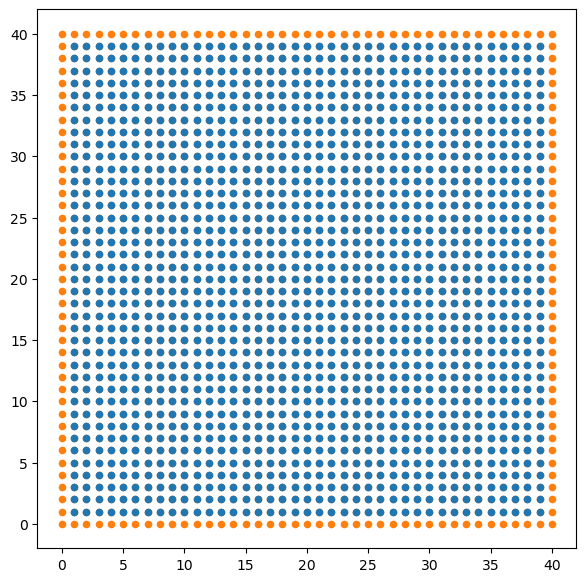

In [15]:
ener, states, degenerate_indices = tb.solve_eigenproblem_square(parameters, number_of_bands = nbands, plot_shape=True)

/tmp/ipykernel_13557/2725401766.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_13557/2725401766.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (3,3))


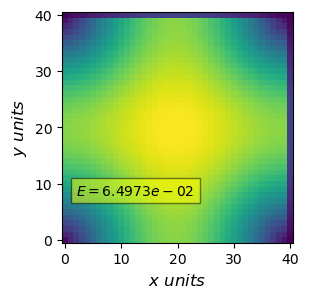

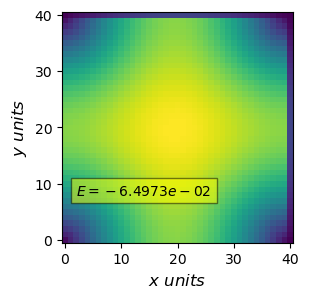

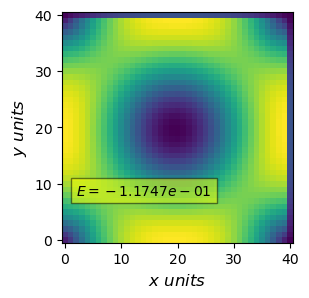

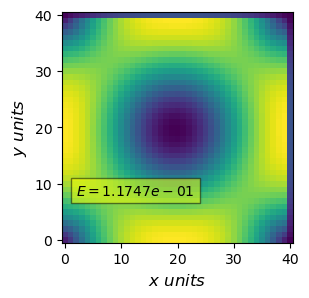

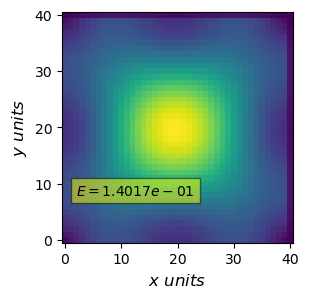

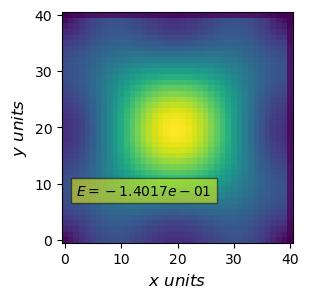

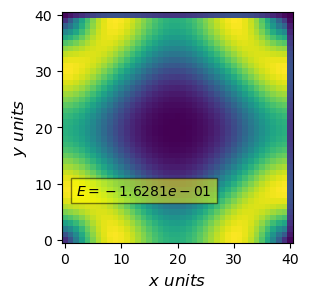

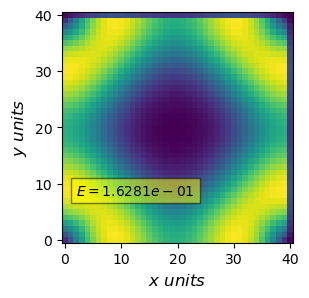

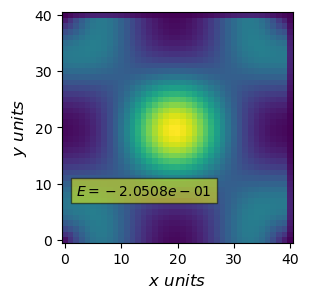

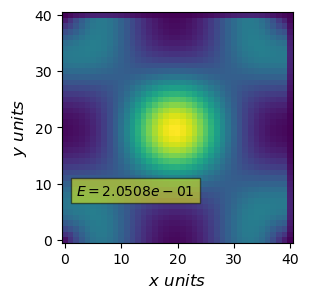

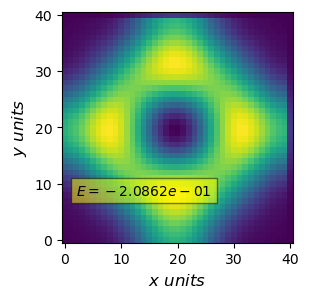

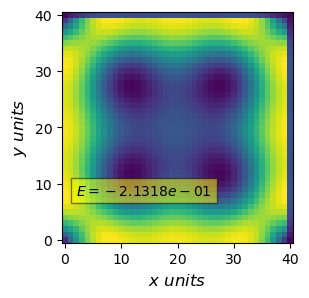

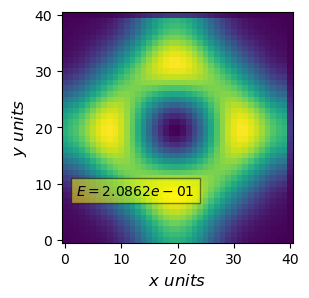

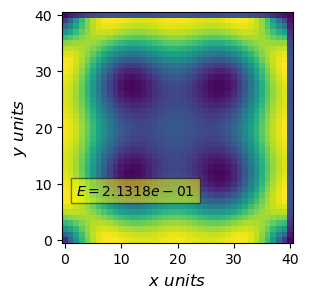

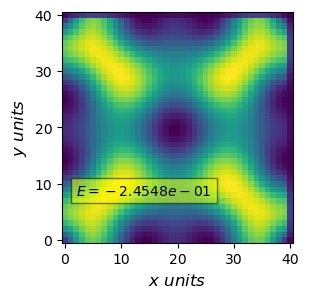

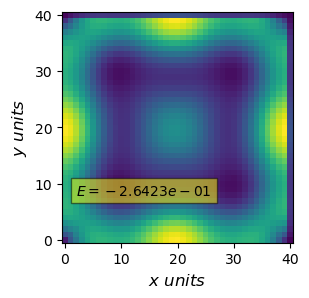

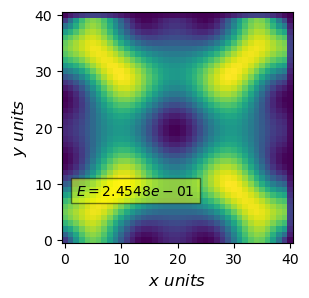

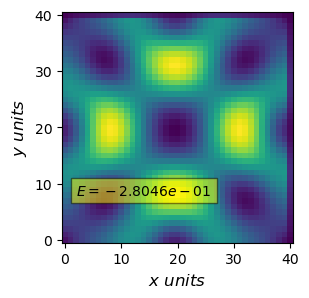

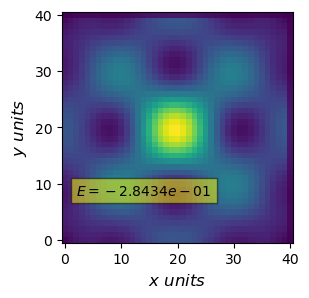

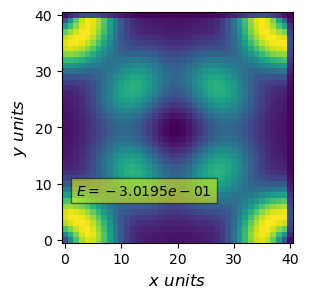

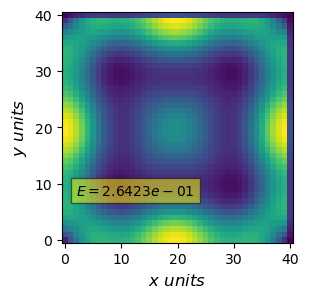

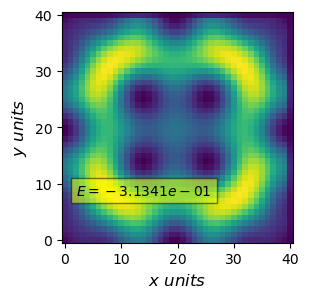

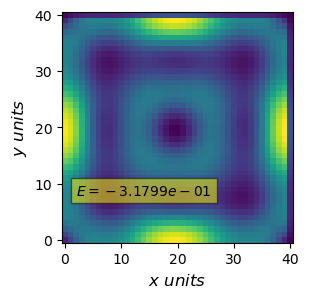

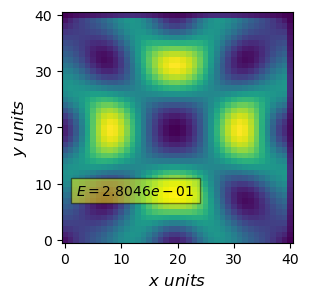

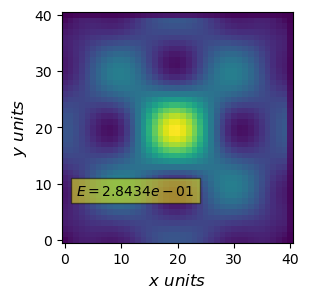

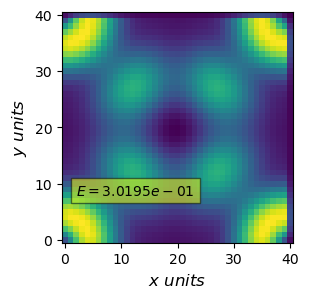

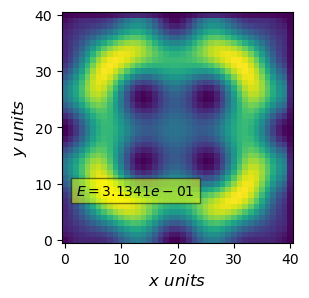

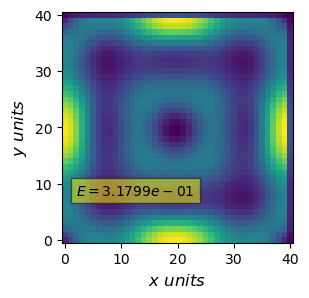

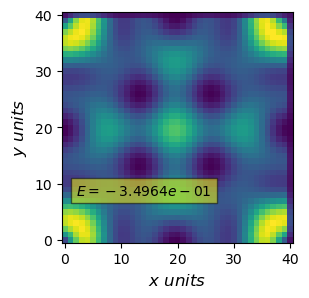

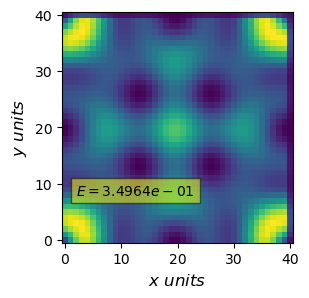

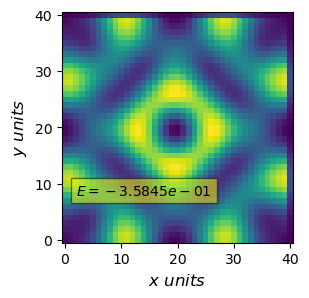

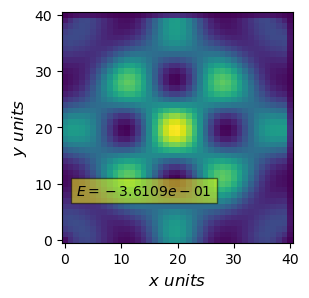

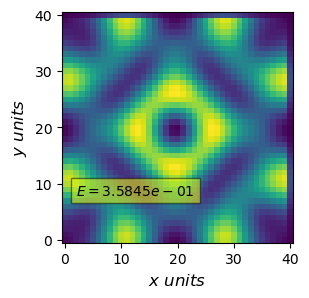

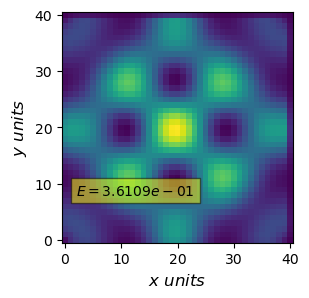

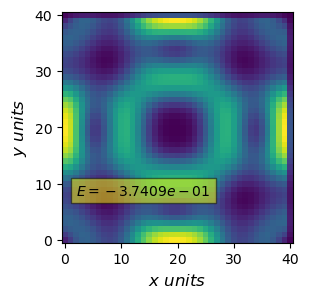

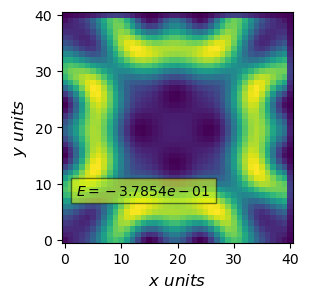

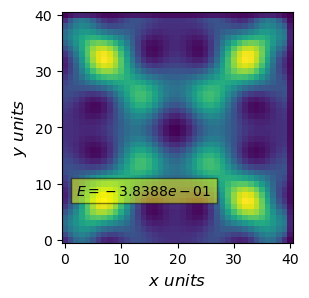

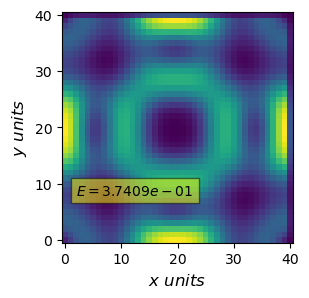

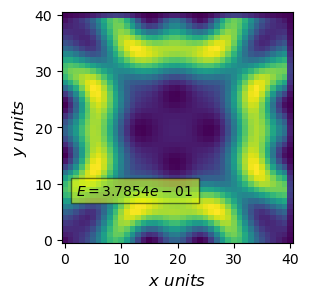

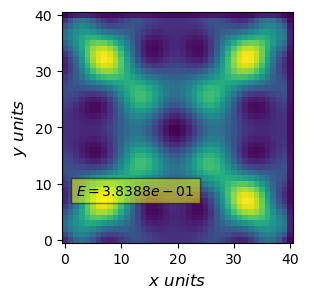

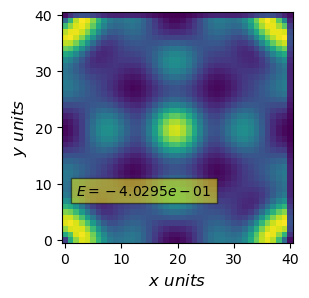

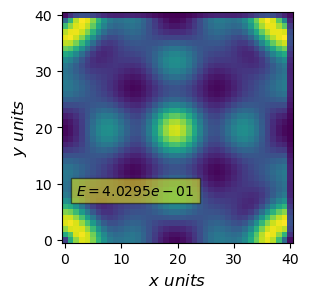

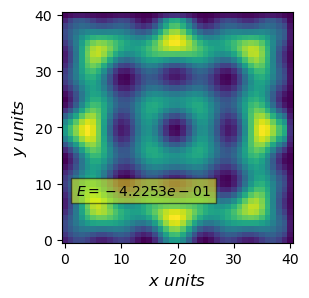

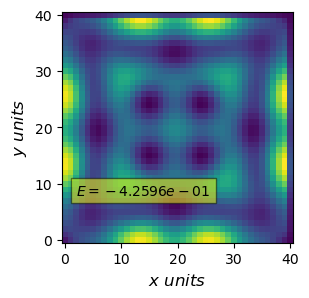

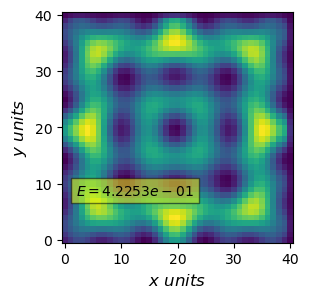

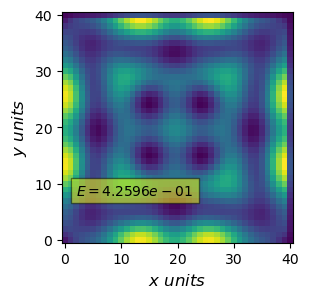

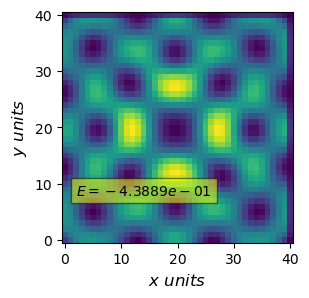

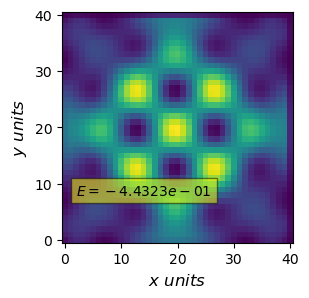

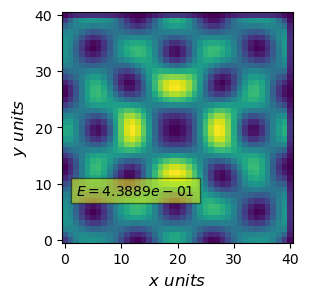

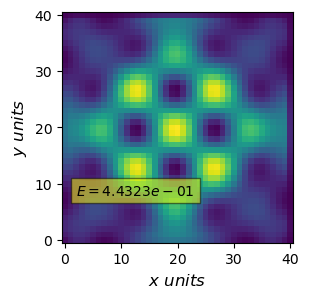

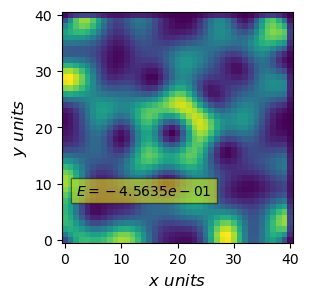

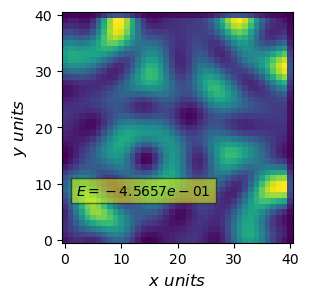

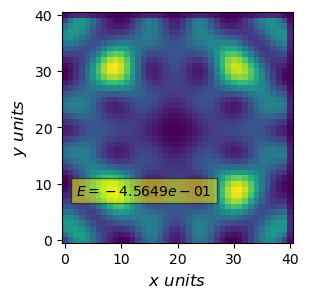

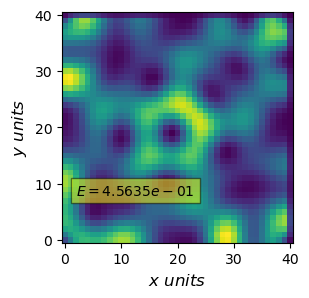

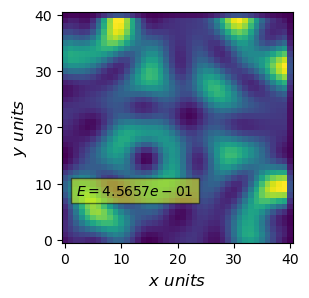

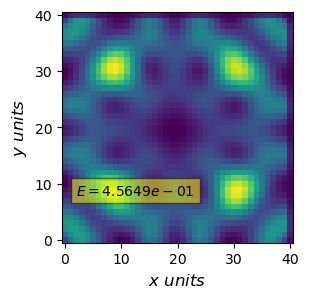

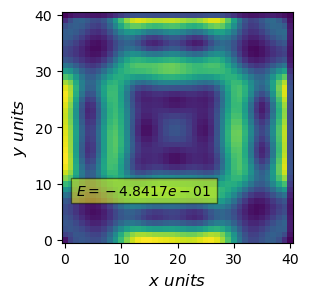

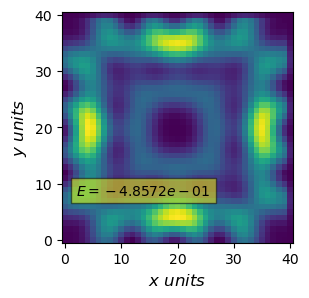

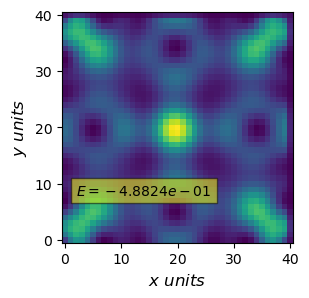

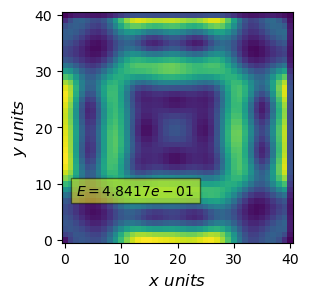

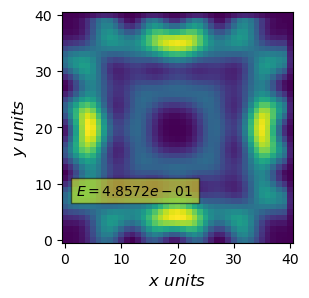

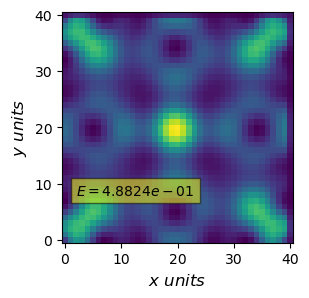

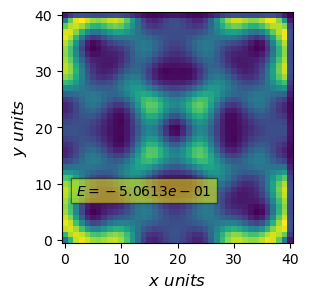

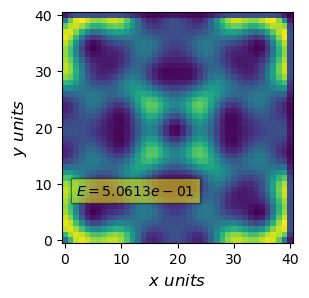

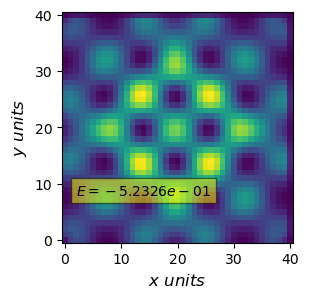

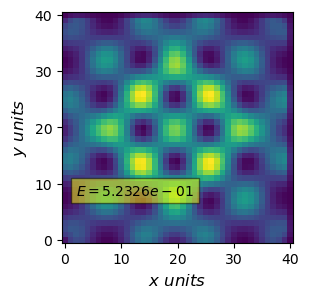

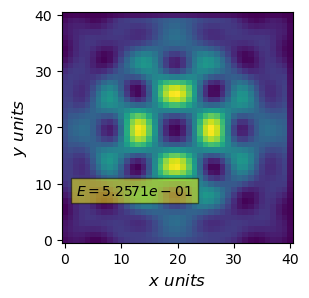

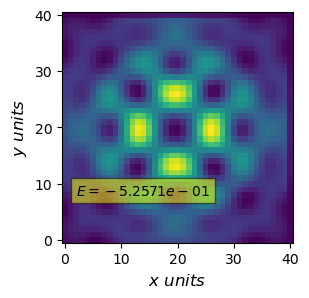

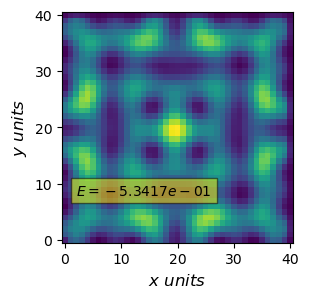

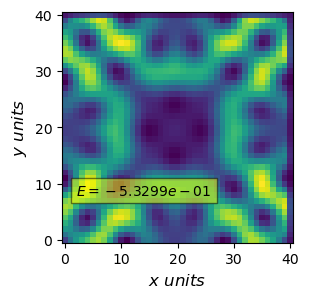

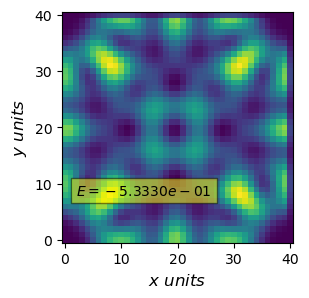

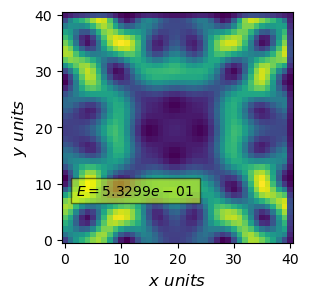

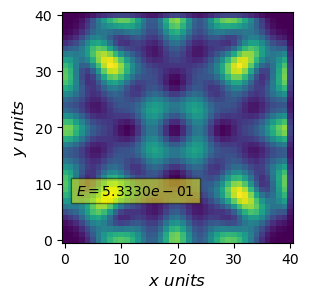

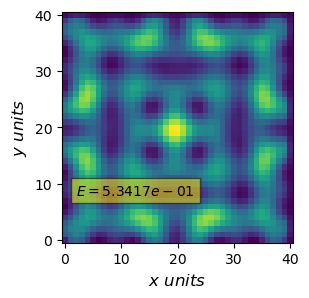

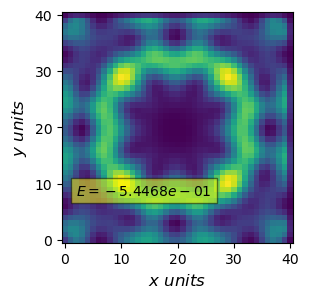

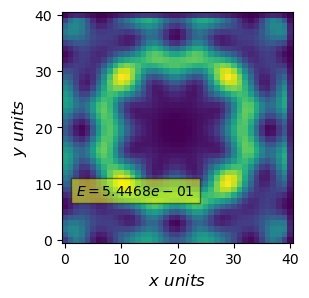

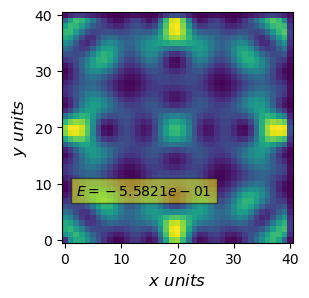

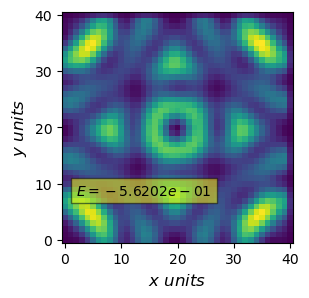

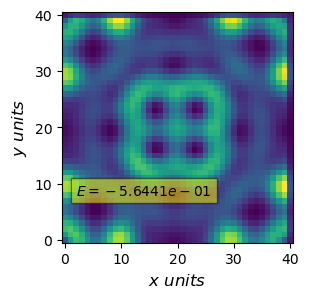

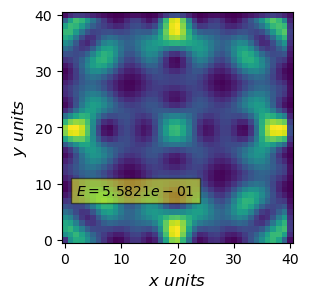

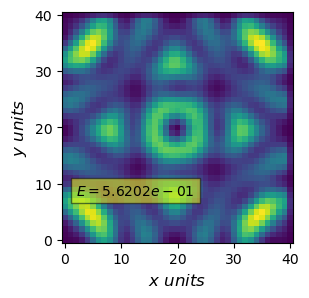

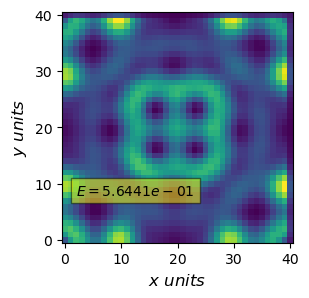

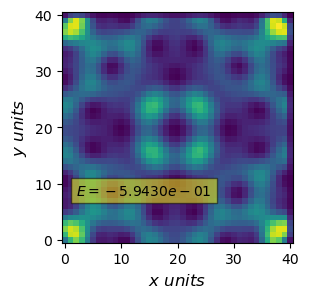

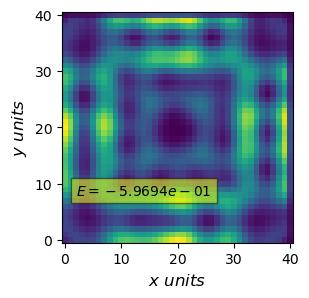

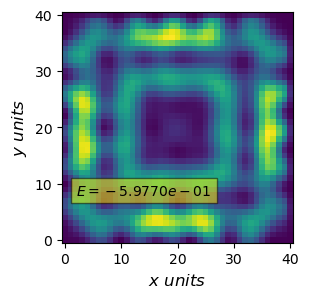

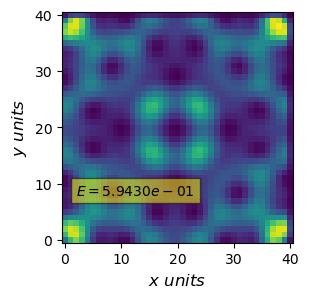

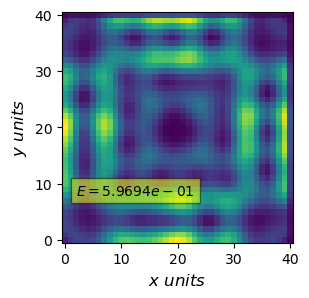

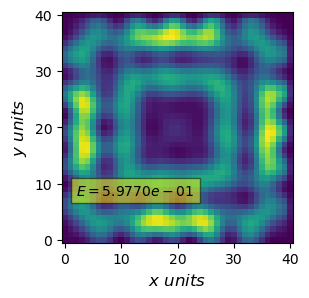

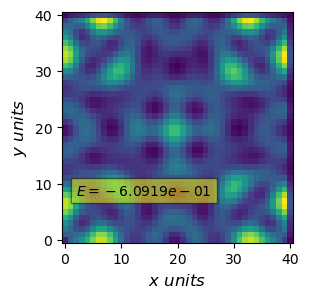

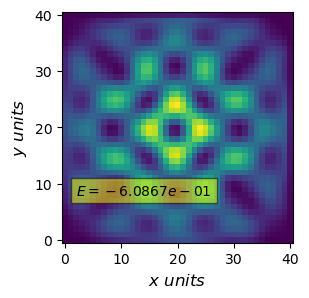

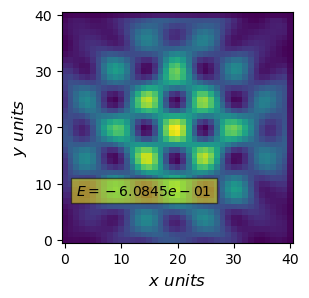

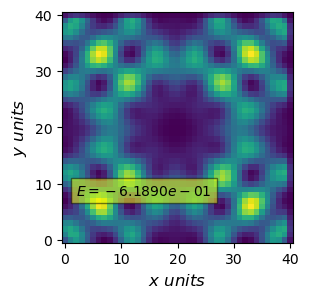

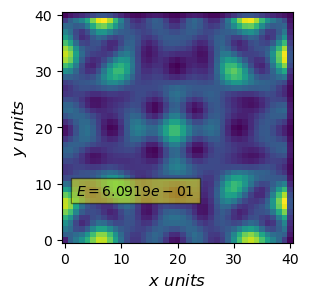

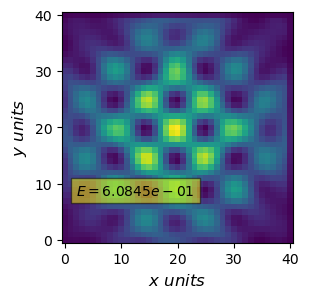

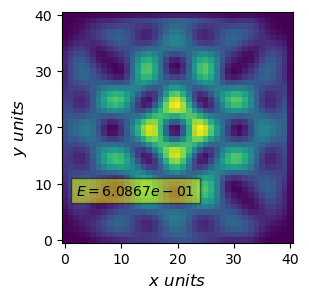

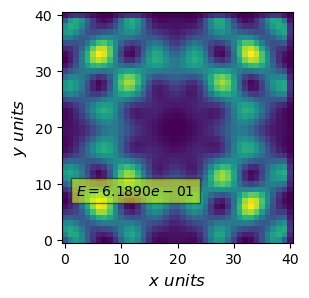

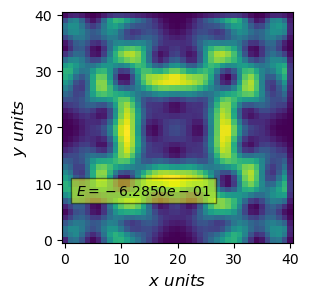

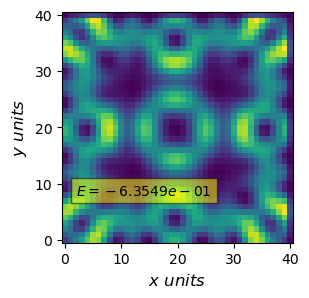

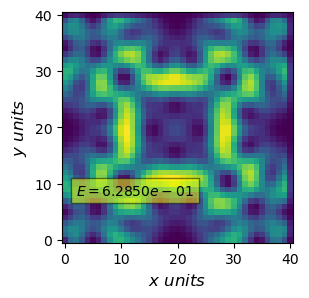

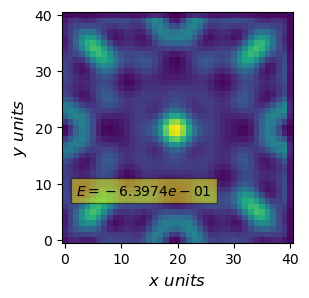

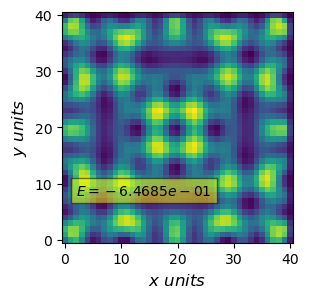

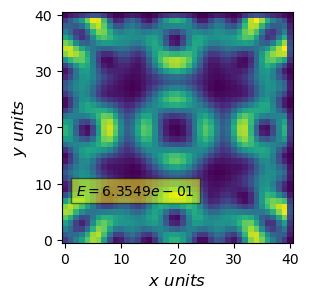

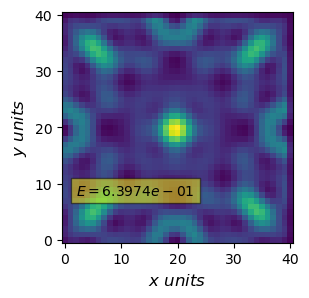

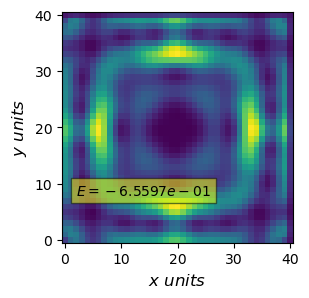

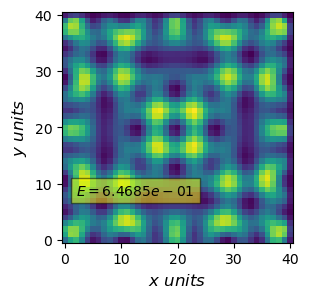

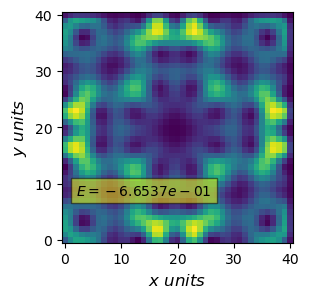

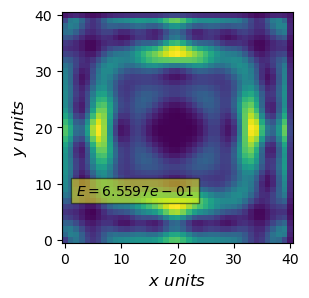

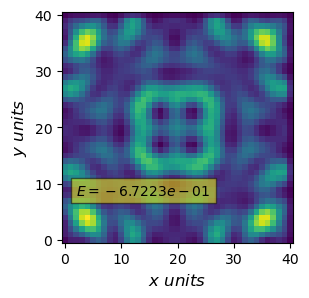

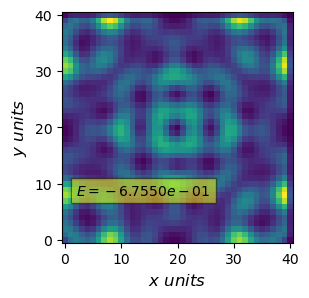

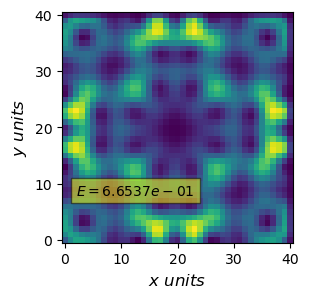

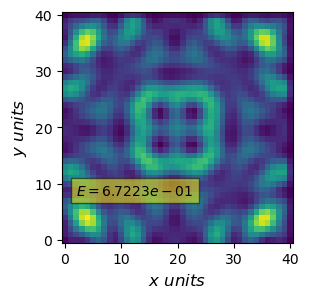

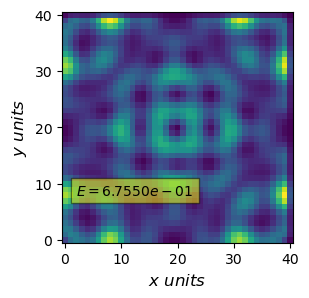

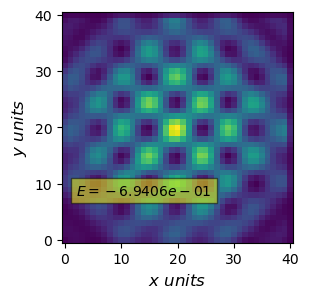

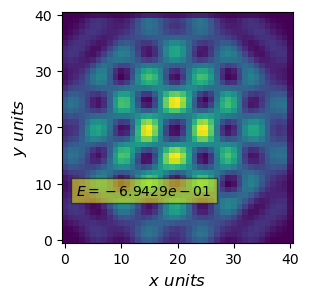

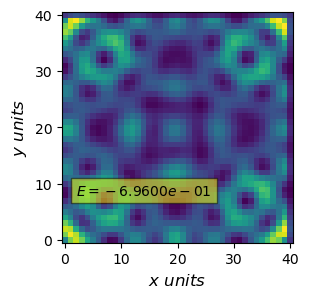

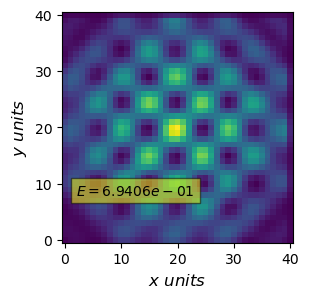

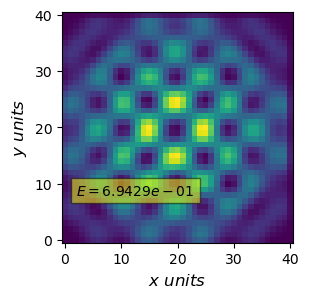

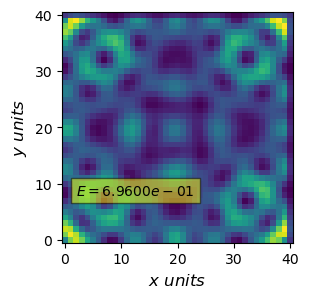

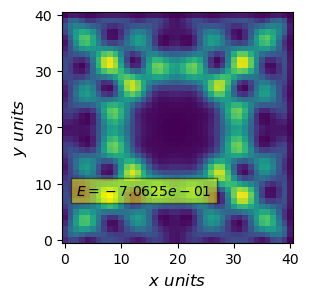

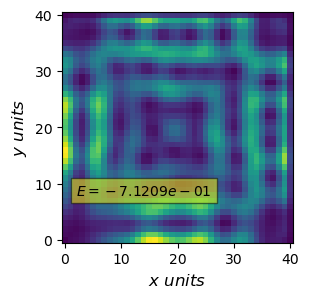

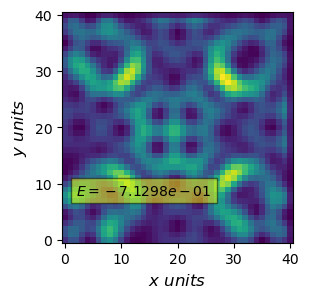

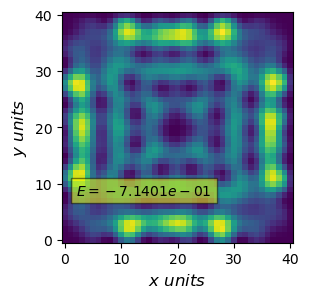

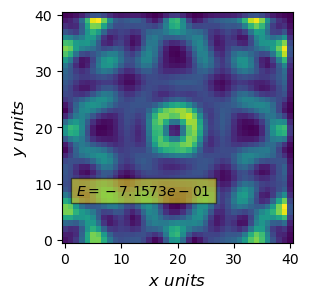

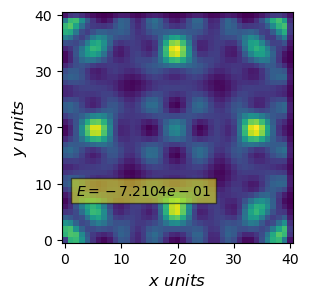

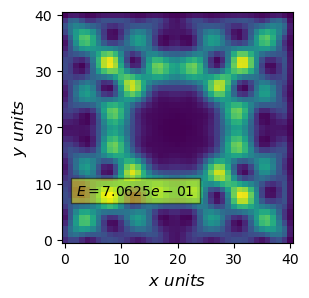

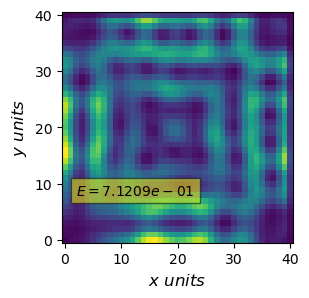

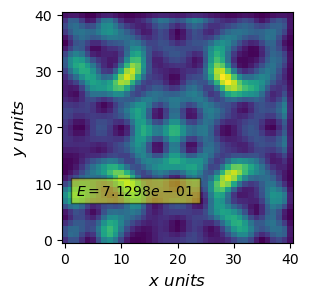

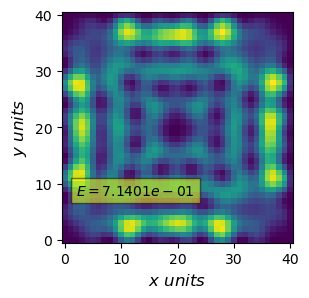

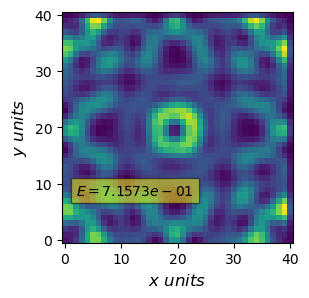

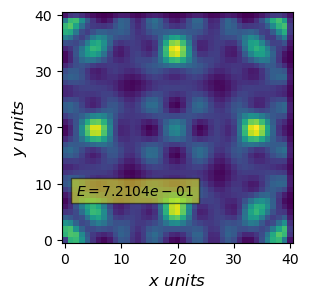

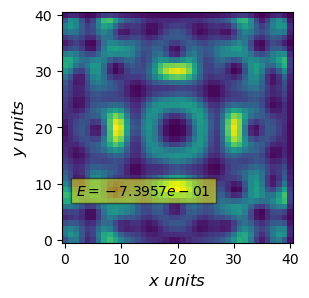

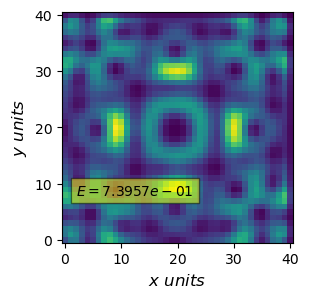

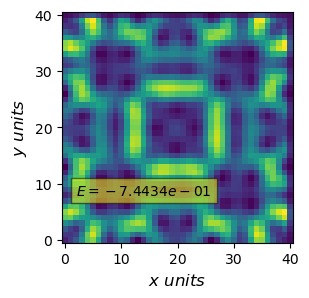

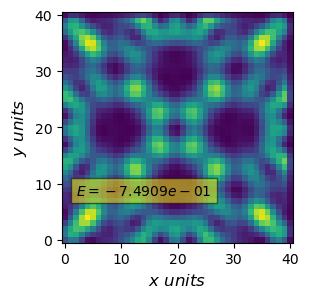

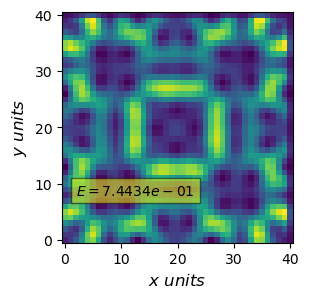

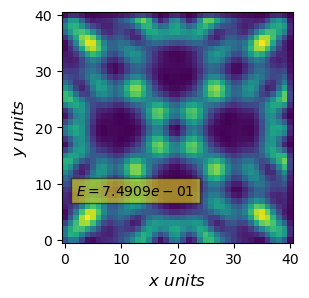

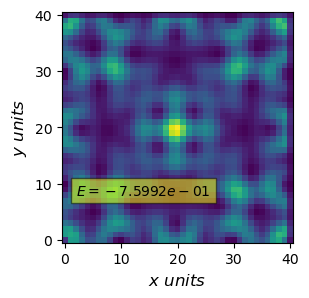

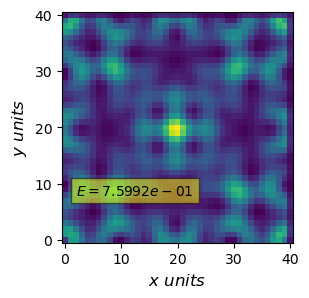

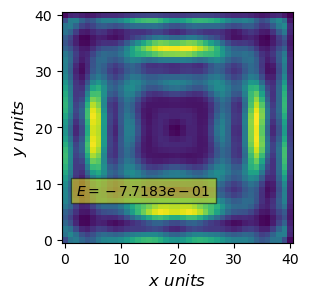

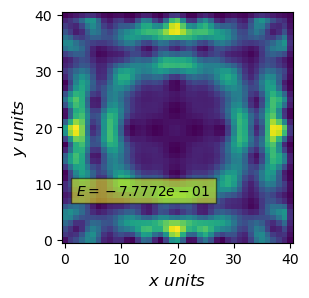

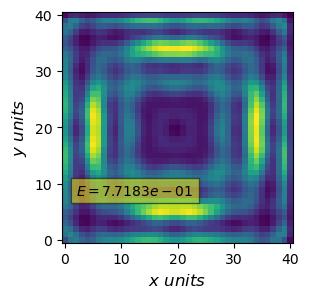

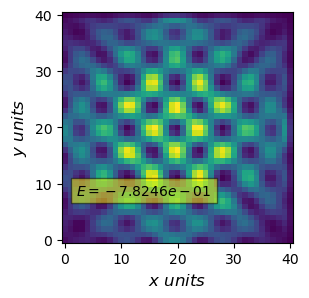

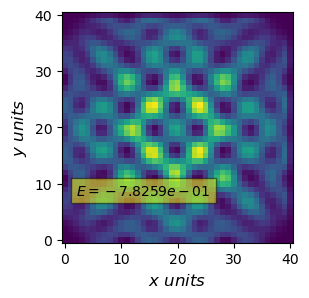

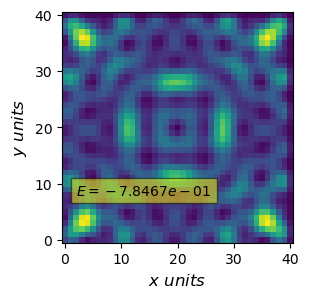

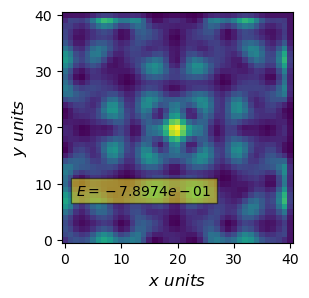

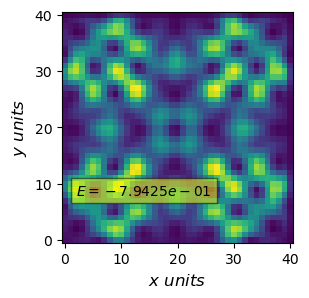

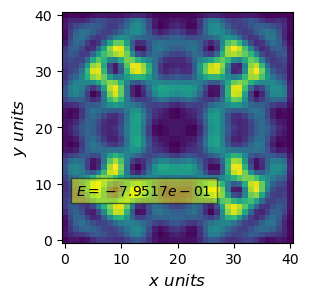

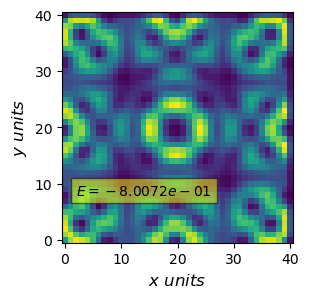

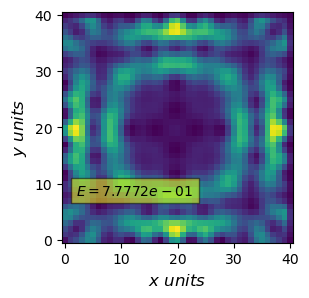

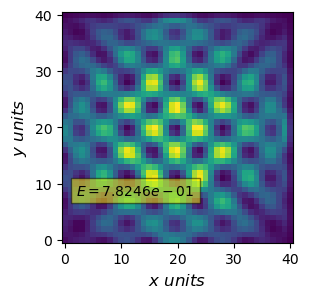

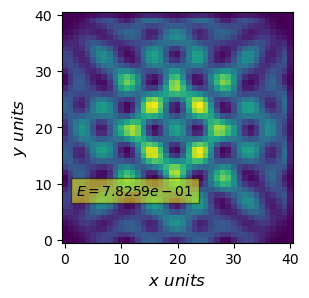

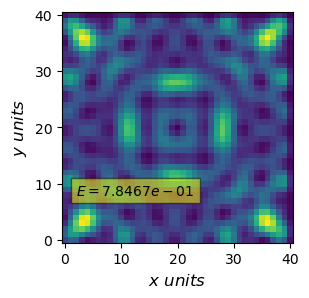

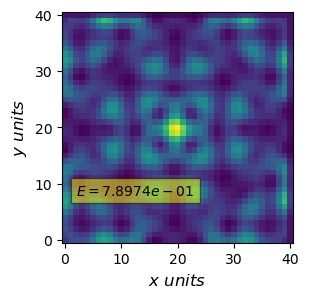

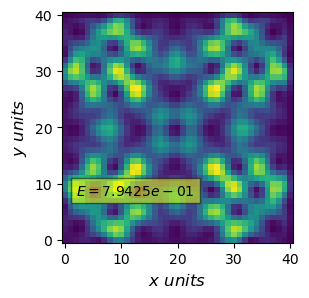

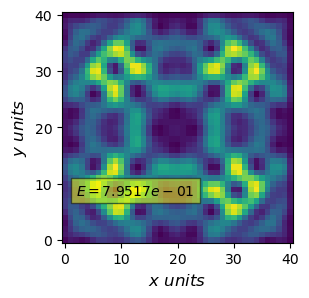

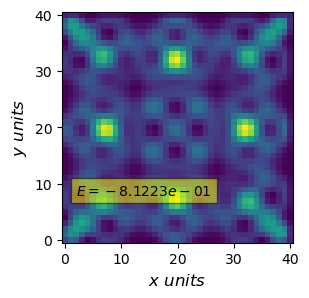

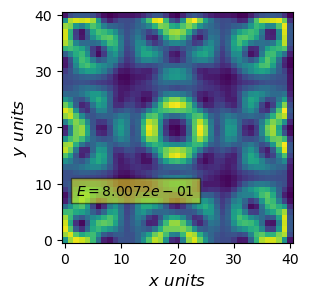

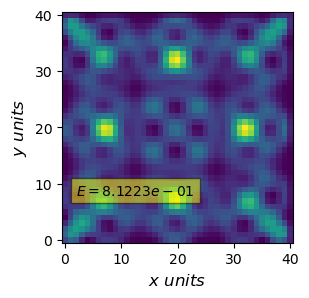

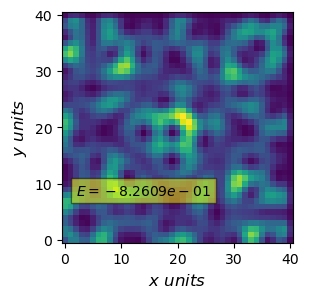

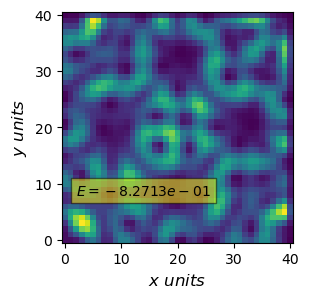

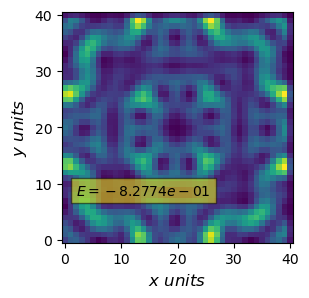

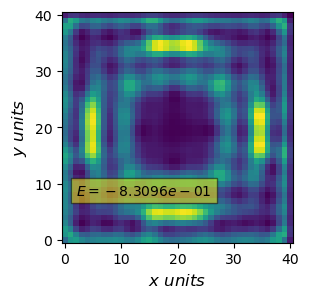

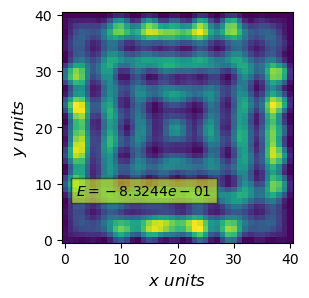

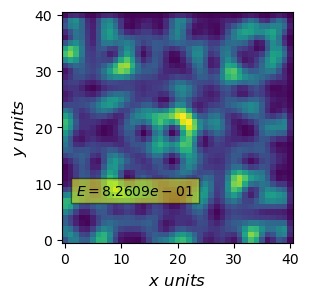

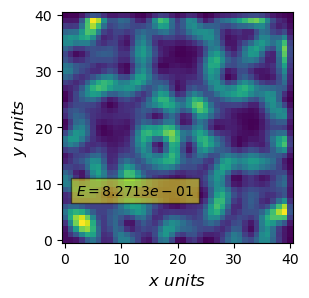

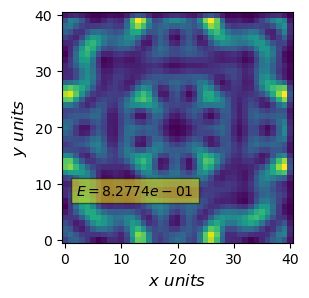

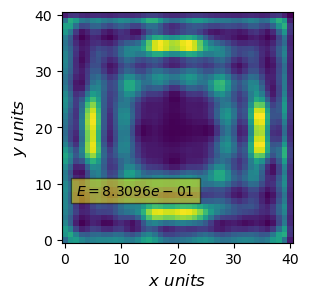

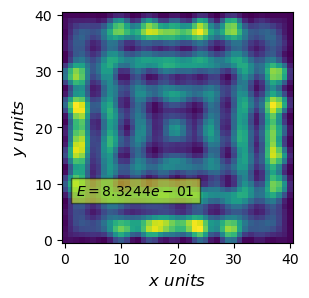

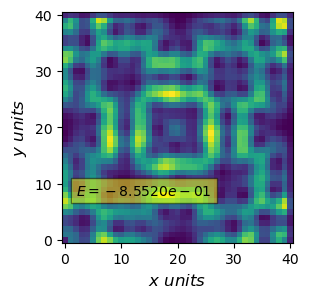

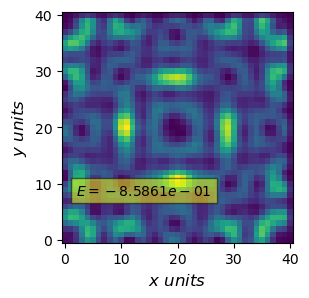

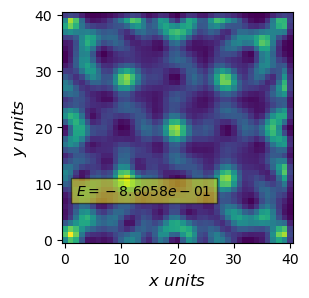

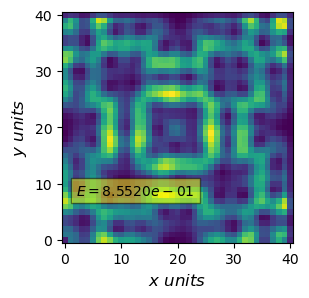

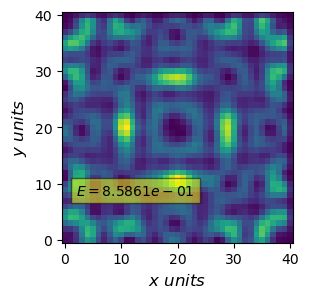

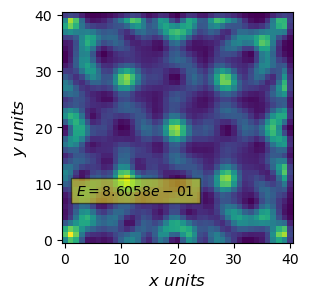

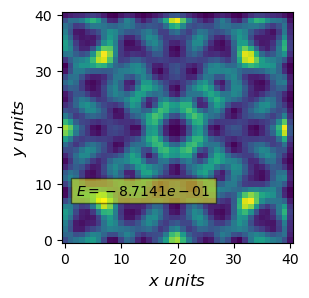

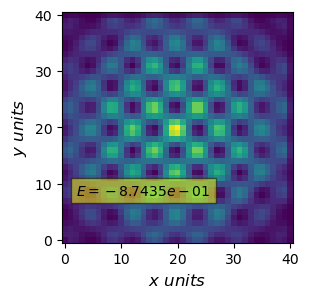

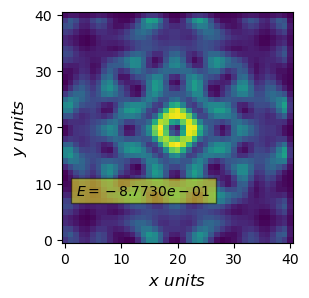

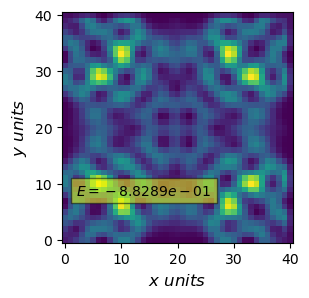

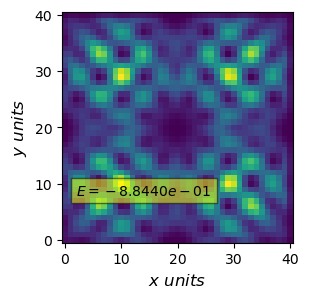

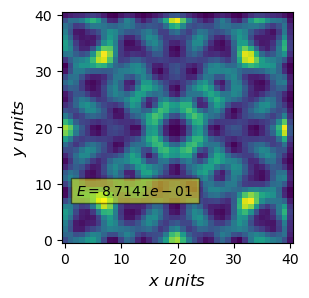

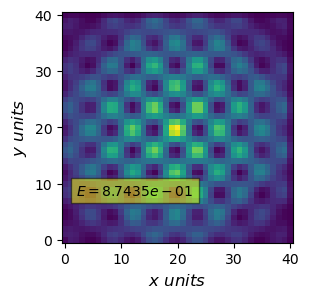

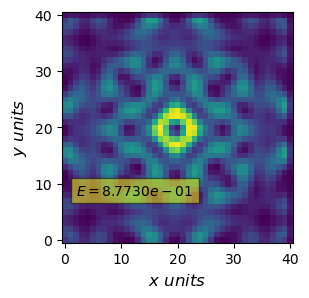

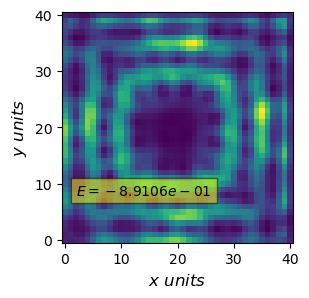

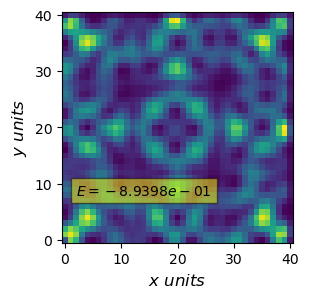

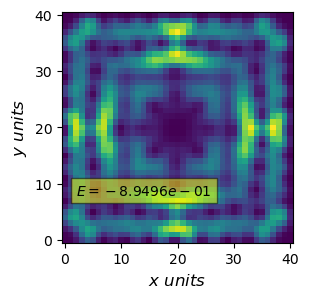

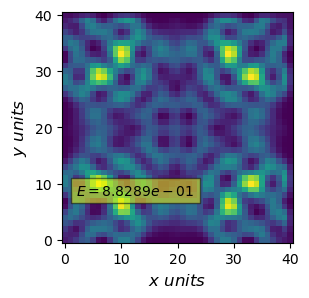

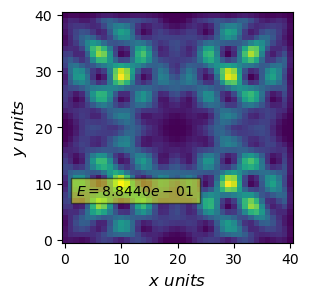

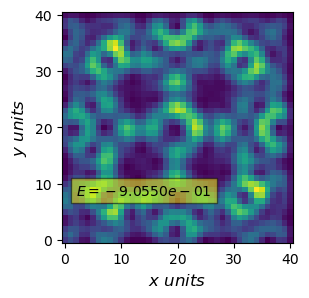

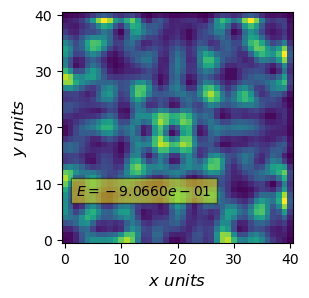

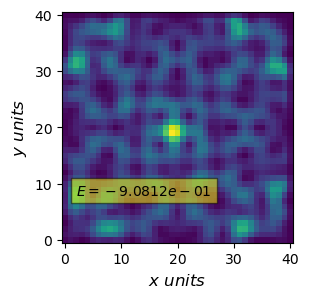

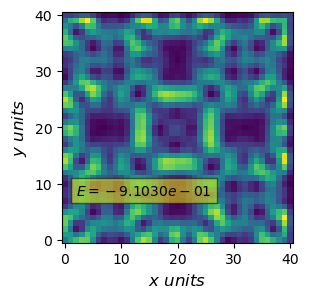

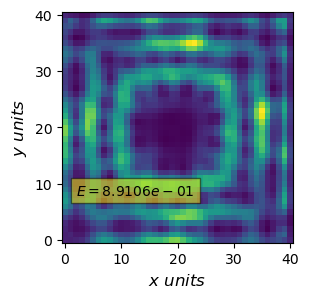

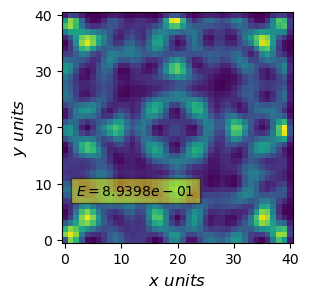

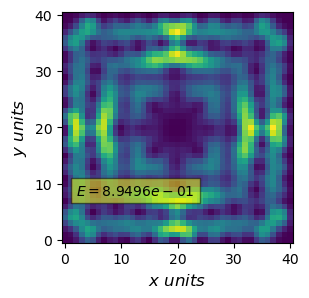

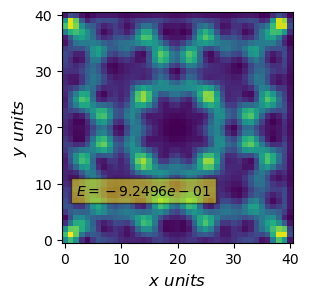

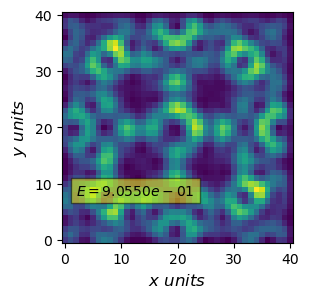

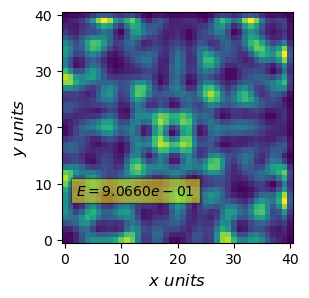

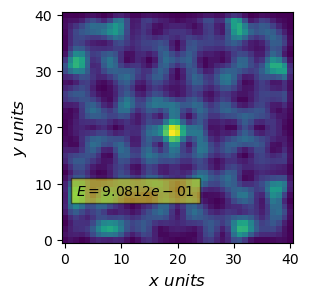

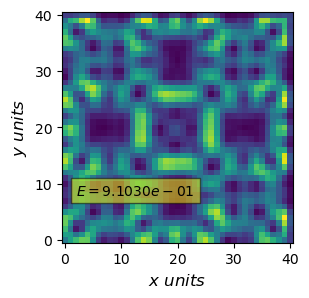

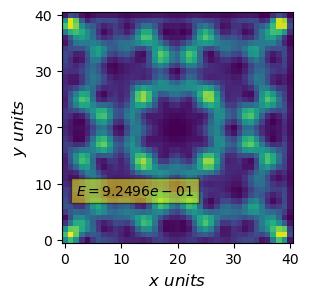

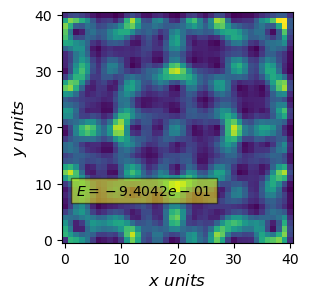

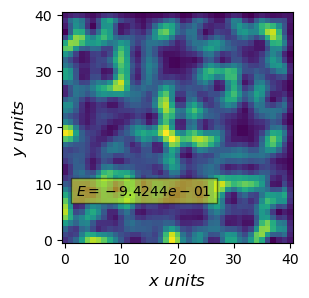

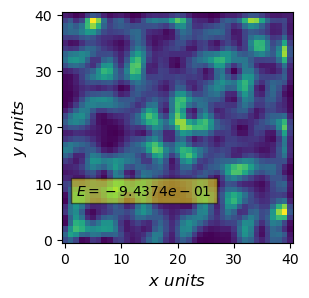

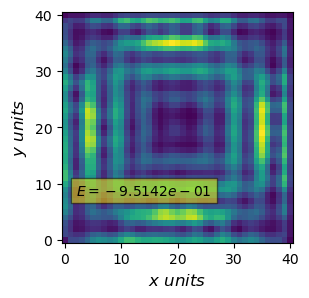

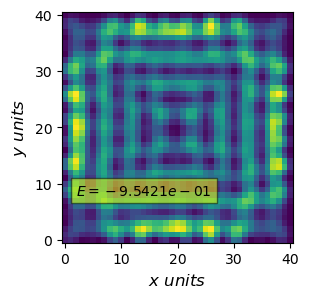

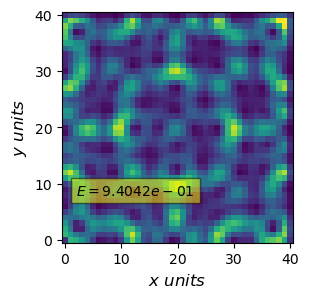

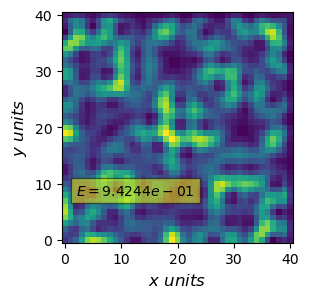

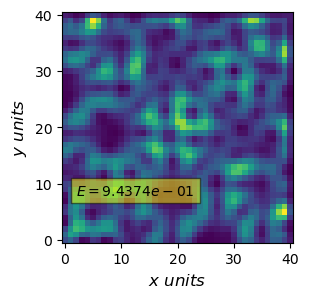

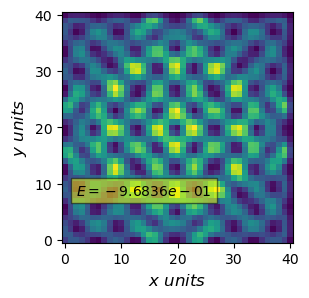

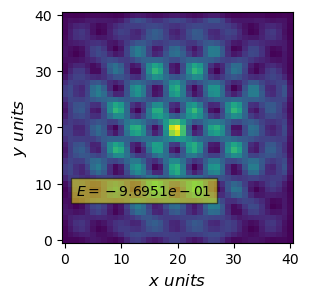

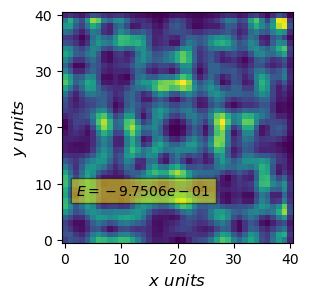

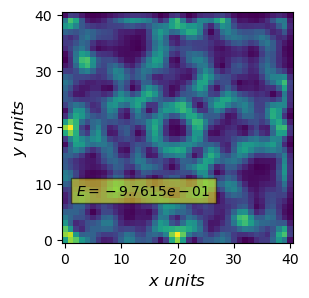

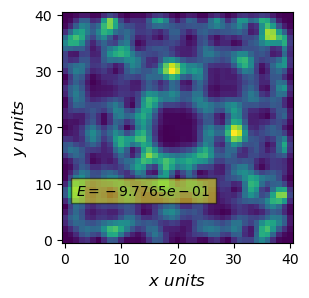

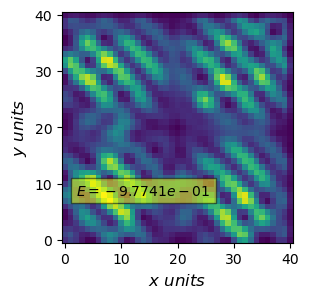

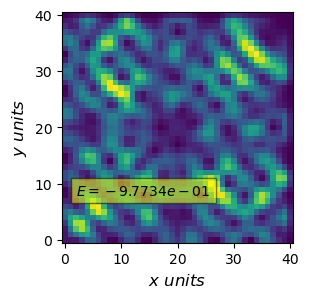

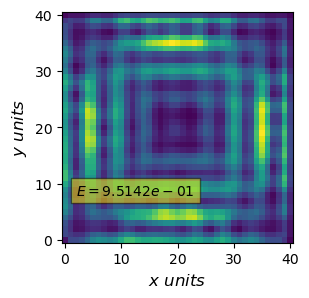

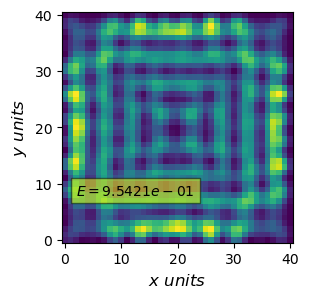

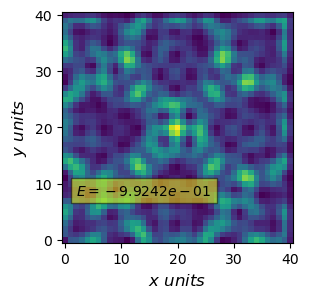

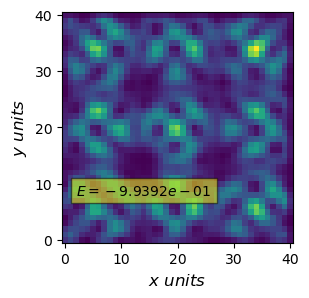

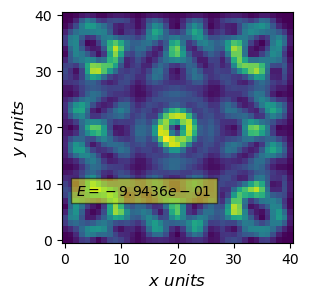

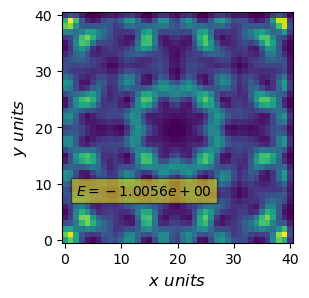

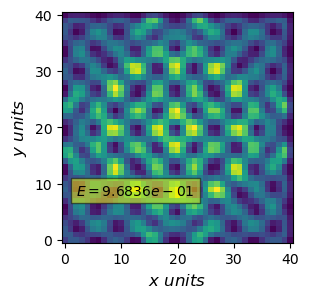

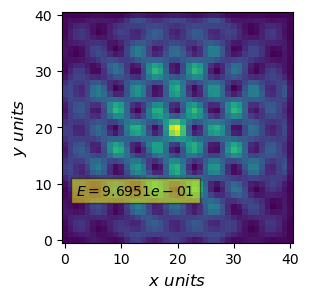

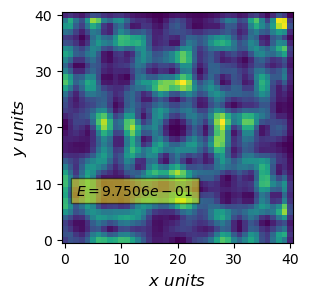

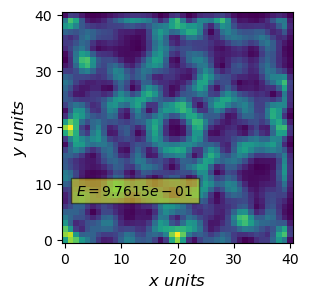

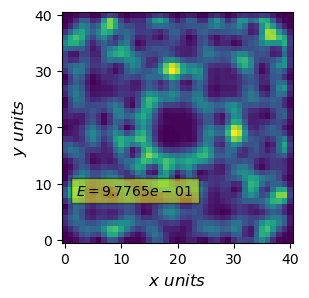

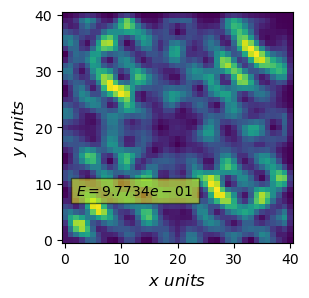

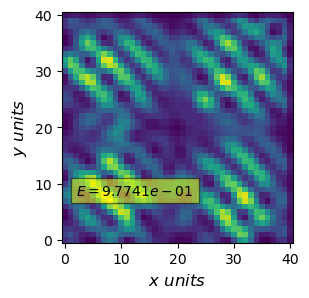

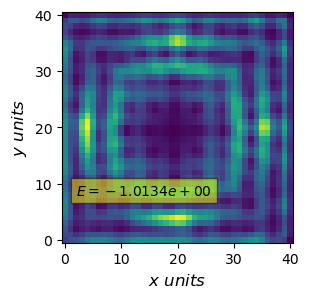

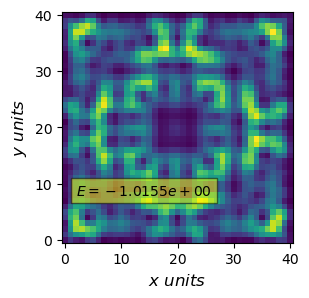

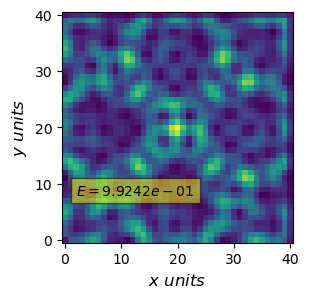

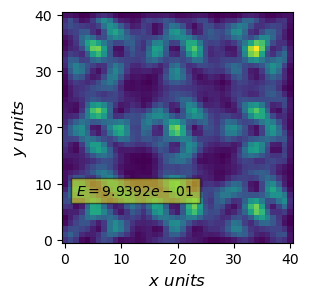

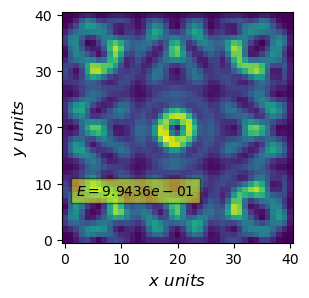

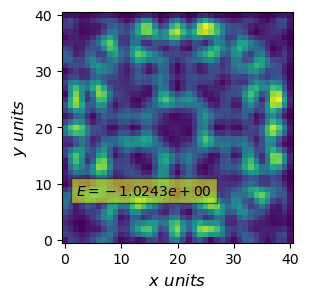

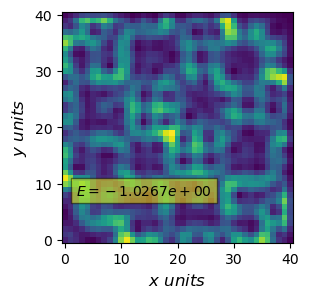

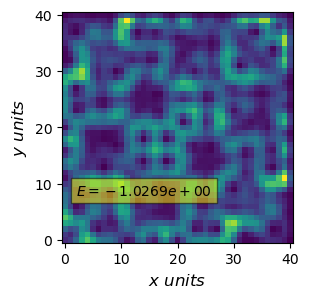

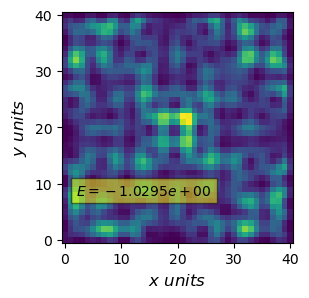

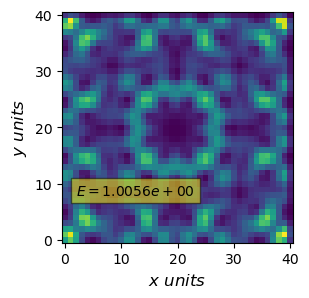

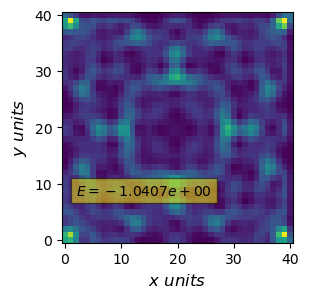

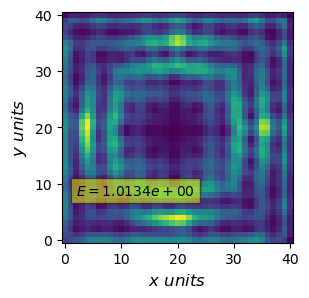

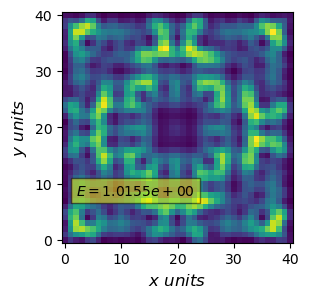

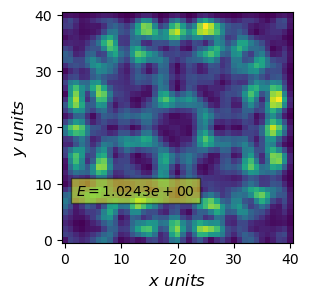

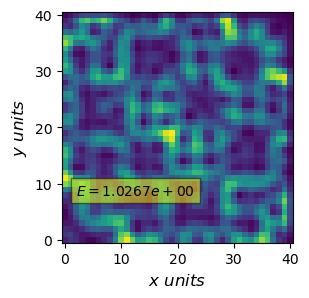

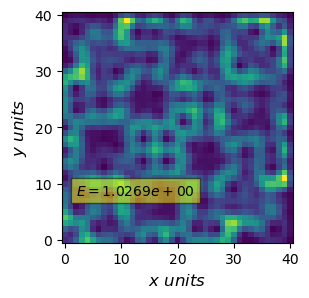

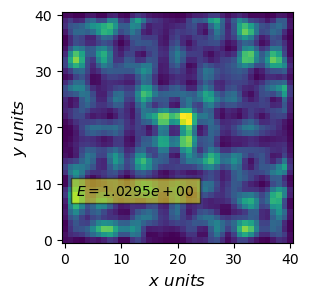

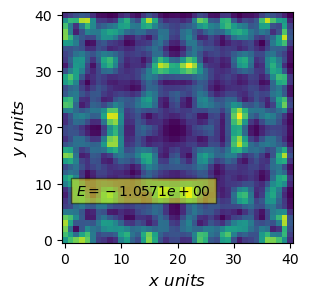

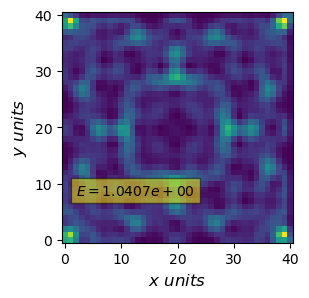

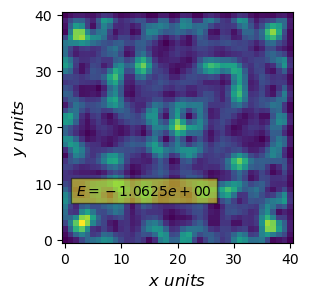

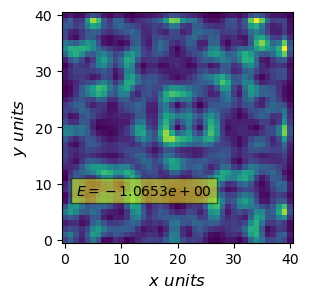

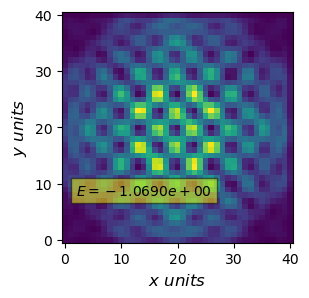

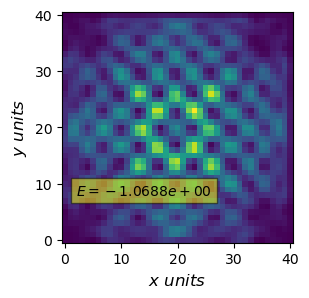

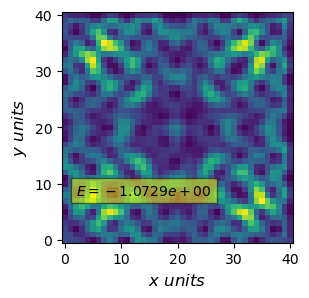

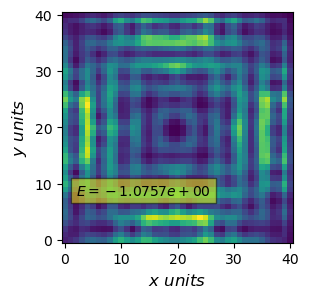

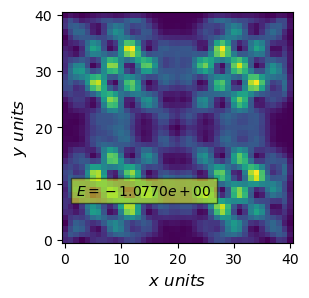

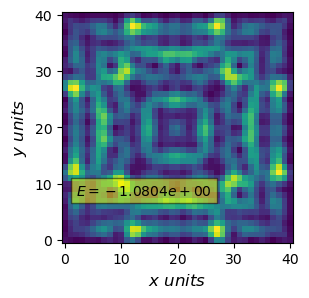

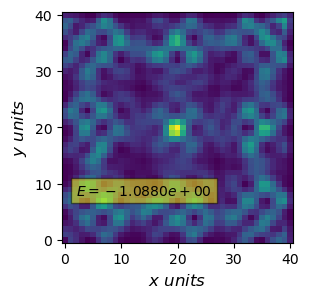

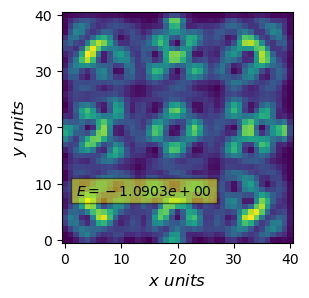

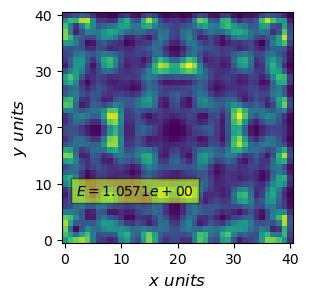

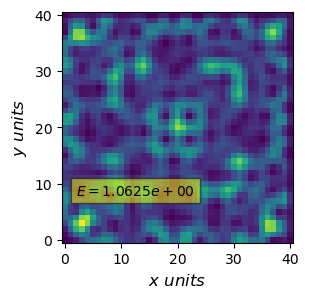

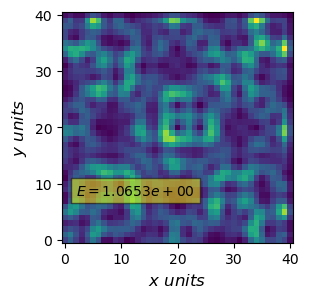

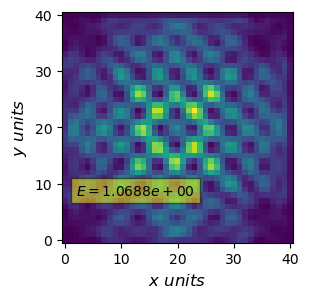

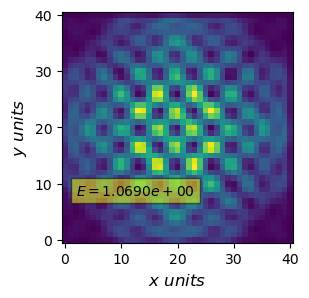

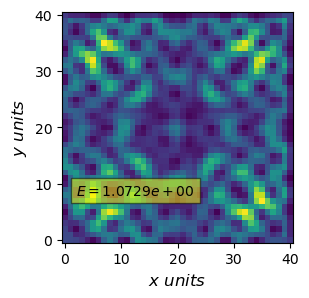

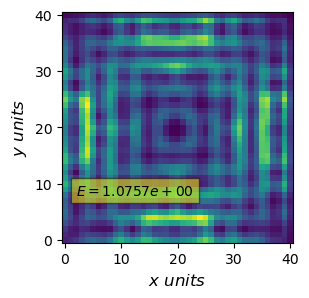

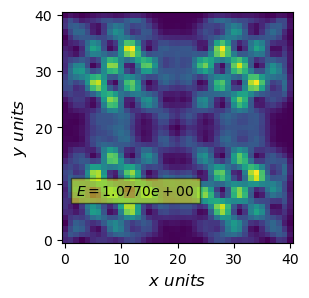

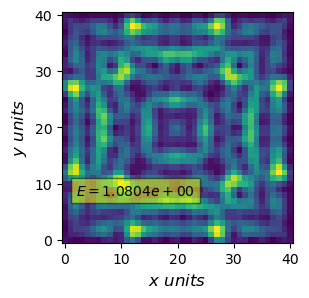

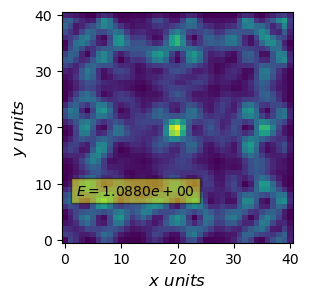

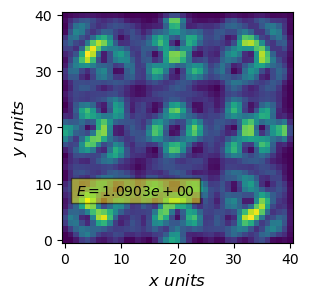

In [16]:
for i in range(nbands):
    to_plot = states[i,:,:,:]

    fig = plt.figure(figsize = (3,3))
    ax = fig.add_subplot(111)
    
    ax.imshow(np.sum(np.abs(to_plot)**2,axis = 0),vmin = 0, origin = "lower")
    #ax.imshow(np.abs(to_plot[1])**2,vmin = 0,cmap = 'cividis') This would plot only spin down probability density
    formatted_number = f"{ener[i]:.4e}"
    plt.text(2, 8,rf'$E ={formatted_number}$' , fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
    
    ax.set_ylabel(r"$y$ $units$",fontsize = 12)
    ax.set_xlabel(r"$x$ $units$",fontsize = 12)
    
    
    fig.show()

Text(0.5, 0, '$r$ $units$')

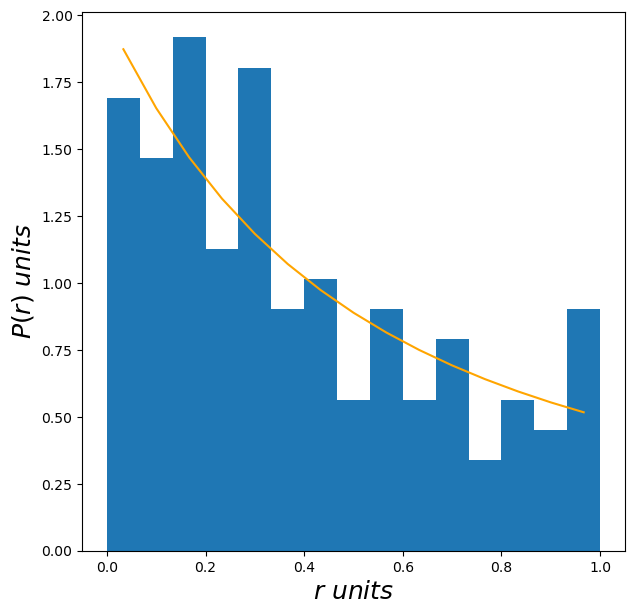

In [17]:
def spacing_ratios_distribution(spectrum, nbins = 41):
    
    spacings = (np.sort(spectrum)-np.roll(np.sort(spectrum),1))[1:]
    ratios = (spacings/np.roll(spacings,1))[1:]
    ratios = np.where(ratios<1, ratios, 1/ratios)
    histogram, bin_edges = np.histogram(ratios, range = (0,1), bins = nbins, density = True )
    
    return histogram, bin_edges

nbins_spacing = 15
#ratios_distribution, bin_edges = spacing_ratios_distribution(spectrum_, nbins = nbins_spacing)

ratios_distribution, bin_edges = spacing_ratios_distribution(ener[:len(ener)], nbins = nbins_spacing)

x = (bin_edges[1:]+bin_edges[:-1])/2
dx = (bin_edges[1]-bin_edges[0])
analytical = 2/(1+x)**2

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.bar(x,ratios_distribution,width = dx)
ax.plot(x,analytical, c = 'orange')
ax.set_ylabel(r"$P(r)$ $units$",fontsize = 18)
ax.set_xlabel(r"$r$ $units$",fontsize = 18)

## Let us calculate the bands for a ribbon of the same width as the square and compare them with our spectrum

In [5]:
parameters['Nx'] = 1 #Assume translational invariance in x direction
nbands = int(Ny)
npoints = 101
kmin = -pi
kmax = pi
parameters['ky'] = 0

momenta,bands = tb.make_bands_x(parameters, number_of_bands = nbands,number_of_points = npoints, kmin = -3, kmax = 3)

/tmp/ipykernel_45245/560679792.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


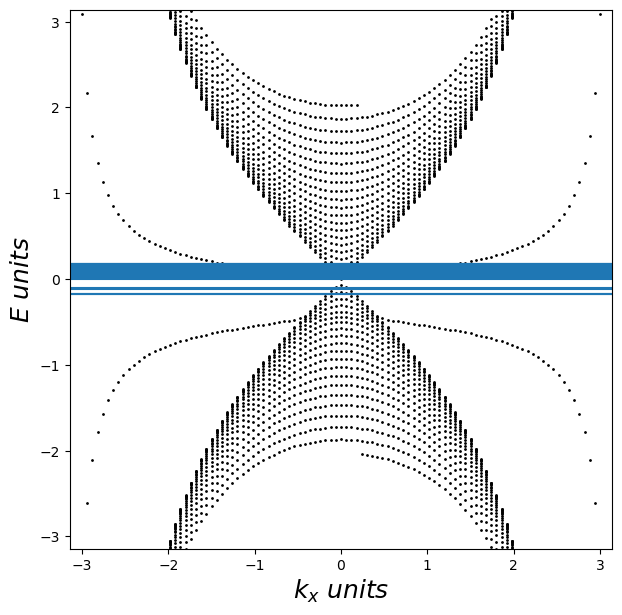

In [6]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)

for b in range(nbands):
    ax.scatter(momenta,bands[:,b], s = 1, c = 'k')
    ax.axhline(ener[b])
ax.set_xlabel(r"$k_x$ $units$",fontsize = 18)
ax.set_ylabel(r"$E$ $units$",fontsize = 18)
ax.set_xlim(-pi,pi)
ax.set_ylim(-pi,pi)

fig.show()

It seems like things are working as expected. Next step steps:

-Do nearest-neighbor level statistics

-Generalise to any shape